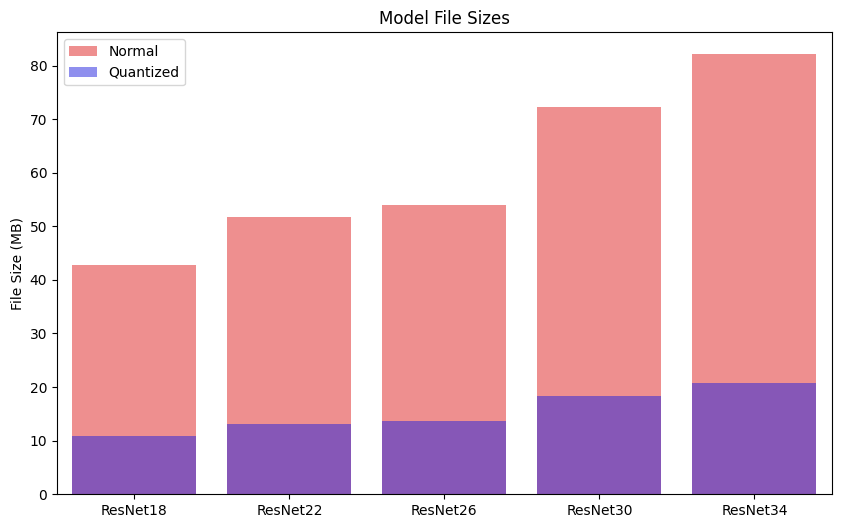

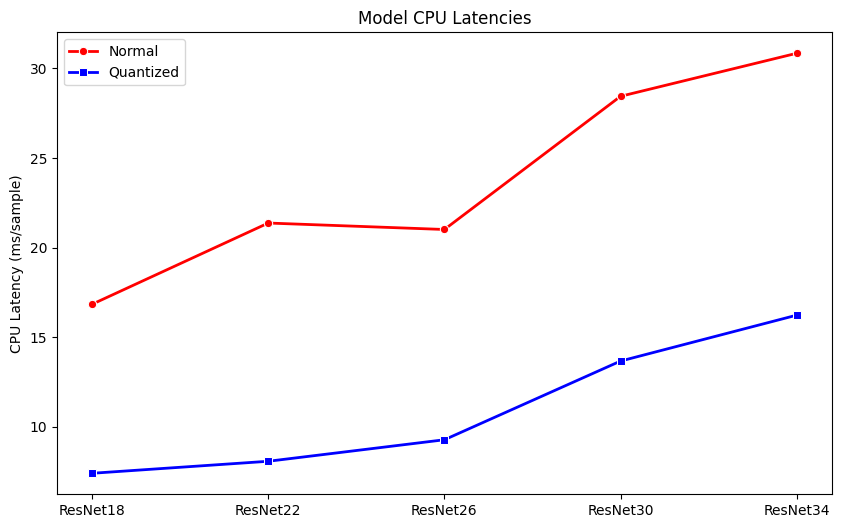

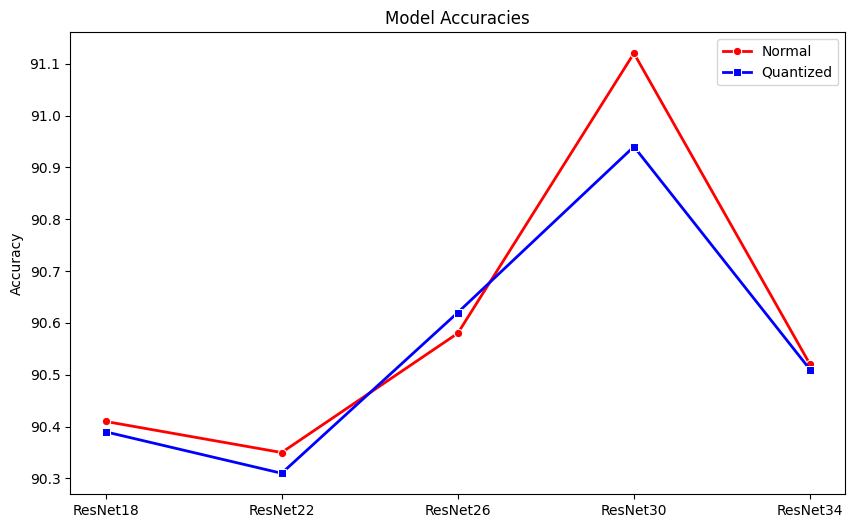

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

model_names = ['ResNet18', 'ResNet22', 'ResNet26', 'ResNet30', 'ResNet34']
file_sizes_normal = [42.7, 51.72, 53.99, 72.3, 82.1]
file_sizes_quantized = [10.79, 13.07, 13.66, 18.26, 20.77]
cpu_latencies_normal = [16.84, 21.37, 21.01, 28.44, 30.84]
cpu_latencies_quantized = [7.41, 8.08, 9.28, 13.67, 16.23]
accuracies_normal = [90.41, 90.35, 90.58, 91.12, 90.52]
accuracies_quantized = [90.39, 90.31, 90.62, 90.94, 90.51]

# Plot 1: File Size
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=model_names, y=file_sizes_normal, ax=ax1, color='r', alpha=0.5, label='Normal')
sns.barplot(x=model_names, y=file_sizes_quantized, ax=ax1, color='b', alpha=0.5, label='Quantized')
ax1.set_ylabel('File Size (MB)')
ax1.set_title('Model File Sizes')
ax1.legend()

# Plot 2: CPU Latency
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.lineplot(x=model_names, y=cpu_latencies_normal, ax=ax2, color='r', marker='o', linewidth=2, label='Normal')
sns.lineplot(x=model_names, y=cpu_latencies_quantized, ax=ax2, color='b', marker='s', linewidth=2, label='Quantized')
ax2.set_ylabel('CPU Latency (ms/sample)')
ax2.set_title('Model CPU Latencies')
ax2.legend()

# Plot 3: Accuracy
fig, ax3 = plt.subplots(figsize=(10, 6))
sns.lineplot(x=model_names, y=accuracies_normal, ax=ax3, color='r', marker='o', linewidth=2, label='Normal')
sns.lineplot(x=model_names, y=accuracies_quantized, ax=ax3, color='b', marker='s', linewidth=2, label='Quantized')
ax3.set_ylabel('Accuracy')
ax3.set_title('Model Accuracies')
ax3.legend()

plt.show()


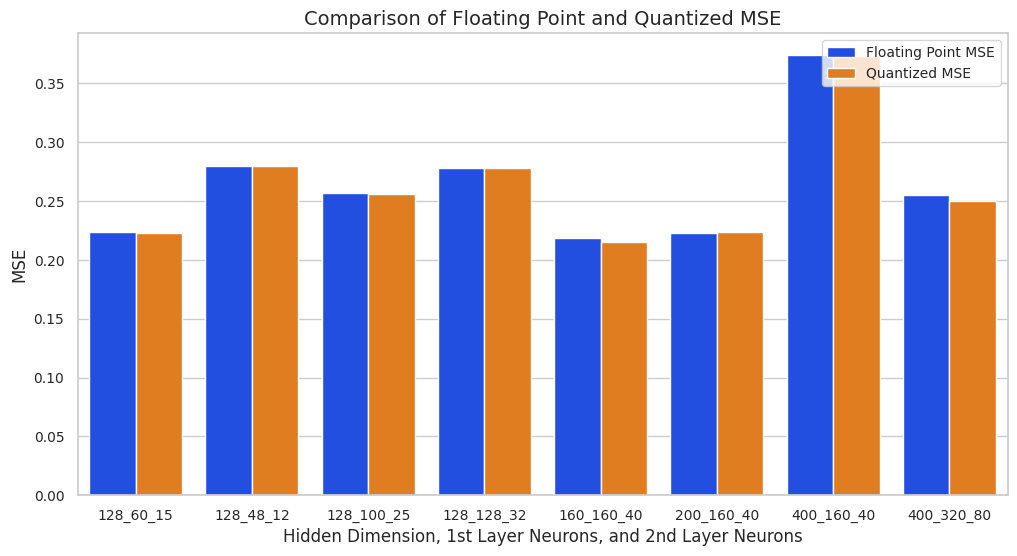

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define data for MSE table
mse_data = {
    'Hidden Dimension': [128, 128, 128, 128, 160, 200, 400, 400],
    'Neurons in the 1st Layers': [60, 48, 100, 128, 160, 160, 160, 320],
    'Neurons in the 2nd Layers': [15, 12, 25, 32, 40, 40, 40, 80],
    'Floating Point MSE': [0.224, 0.280, 0.257, 0.278, 0.219, 0.223, 0.374, 0.255],
    'Quantized MSE': [0.223, 0.280, 0.256, 0.278, 0.215, 0.224, 0.373, 0.250]
}

# Convert dictionary to pandas dataframe
mse_df = pd.DataFrame(mse_data)

# Melt dataframe to 'long' format
mse_df_melt = pd.melt(mse_df, id_vars=['Hidden Dimension', 'Neurons in the 1st Layers', 'Neurons in the 2nd Layers'],
                      value_vars=['Floating Point MSE', 'Quantized MSE'],
                      var_name='Data Type', value_name='MSE')

# Set up seaborn barplot with x-axis as a combination of 'Hidden Dimension', 'Neurons in the 1st Layers', and 'Neurons in the 2nd Layers'
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.barplot(data=mse_df_melt, x=mse_df_melt.apply(lambda x: f"{x['Hidden Dimension']}_{x['Neurons in the 1st Layers']}_{x['Neurons in the 2nd Layers']}", axis=1), y='MSE', hue='Data Type', palette='bright')

# Set labels and title
plt.xlabel('Hidden Dimension, 1st Layer Neurons, and 2nd Layer Neurons', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Comparison of Floating Point and Quantized MSE', fontsize=14)

# Set legend position
plt.legend(loc='upper right', fontsize=10)

# Set tick label size
plt.tick_params(labelsize=10)

# Show the plot
plt.show()


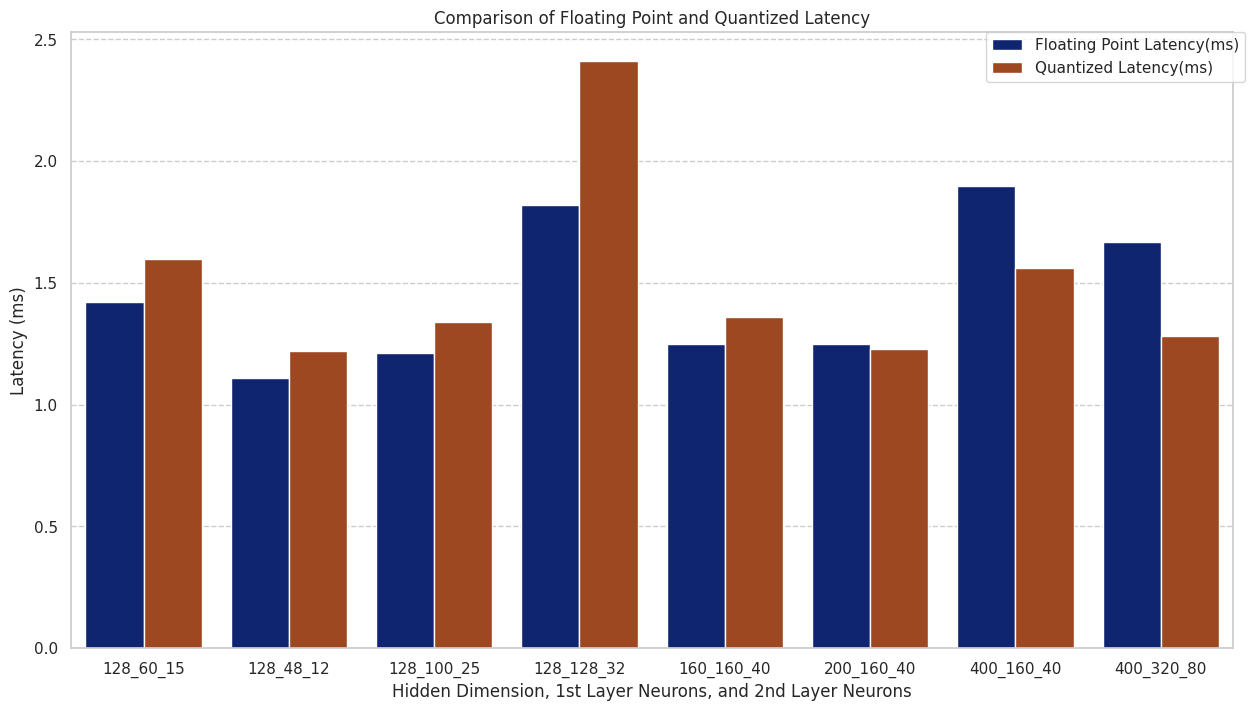

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define data for CPU Latency table
latency_data = {
    'Hidden Dimension': [128, 128, 128, 128, 160, 200, 400, 400],
    'Neurons in the 1st Layers': [60, 48, 100, 128, 160, 160, 160, 320],
    'Neurons in the 2nd Layers': [15, 12, 25, 32, 40, 40, 40, 80],
    'Floating Point Latency(ms)': [1.42, 1.11, 1.21, 1.82, 1.25, 1.25, 1.90, 1.67],
    'Quantized Latency(ms)': [1.60, 1.22, 1.34, 2.41, 1.36, 1.23, 1.56, 1.28]
}

# Convert dictionary to pandas dataframe
latency_df = pd.DataFrame(latency_data)

# Melt dataframe to 'long' format
latency_df_melt = pd.melt(latency_df, id_vars=['Hidden Dimension', 'Neurons in the 1st Layers', 'Neurons in the 2nd Layers'],
                      value_vars=['Floating Point Latency(ms)', 'Quantized Latency(ms)'],
                      var_name='Data Type', value_name='Latency (ms)')

# Set up seaborn barplot with x-axis as a combination of 'Hidden Dimension', 'Neurons in the 1st Layers', and 'Neurons in the 2nd Layers'
plt.figure(figsize=(15, 8))
sns.barplot(data=latency_df_melt, x=latency_df_melt.apply(lambda x: f"{x['Hidden Dimension']}_{x['Neurons in the 1st Layers']}_{x['Neurons in the 2nd Layers']}", axis=1), y='Latency (ms)', hue='Data Type',palette = 'dark')

# Set labels and title
plt.xlabel('Hidden Dimension, 1st Layer Neurons, and 2nd Layer Neurons')
plt.ylabel('Latency (ms)')
plt.title('Comparison of Floating Point and Quantized Latency')

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

# Add gridlines
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


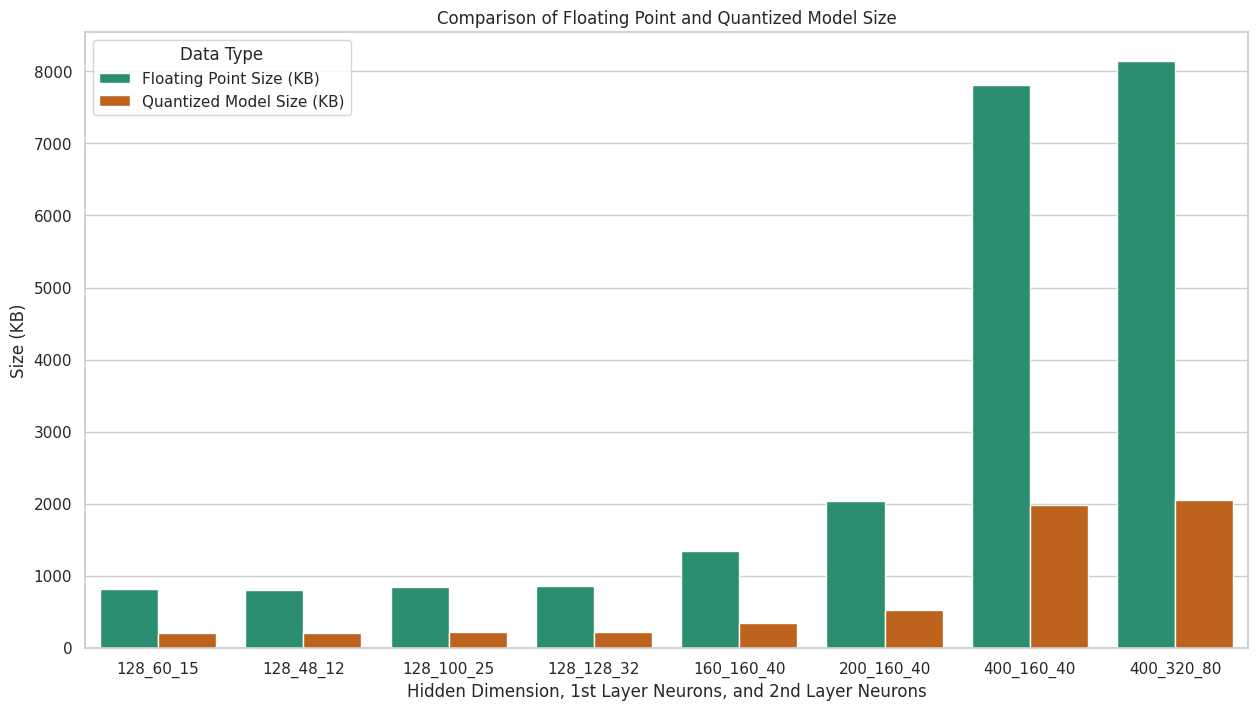

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define data for File Size table
size_data = {
    'Hidden Dimension': [128, 128, 128, 128, 160, 200, 400, 400],
    'Neurons in the 1st Layers': [60, 48, 100, 128, 160, 160, 160, 320],
    'Neurons in the 2nd Layers': [15, 12, 25, 32, 40, 40, 40, 80],
    'Floating Point Size (KB)': [815.26, 807.89, 841.82, 862.07, 1341.82, 2044.95, 7810.64, 8136.51],
    'Quantized Model Size (KB)': [215.23, 213.29, 222.04, 227.10, 348.66, 526.35, 1977.10, 2059.16]
}

# Convert dictionary to pandas dataframe
size_df = pd.DataFrame(size_data)

# Melt dataframe to 'long' format
size_df_melt = pd.melt(size_df, id_vars=['Hidden Dimension', 'Neurons in the 1st Layers', 'Neurons in the 2nd Layers'],
                      value_vars=['Floating Point Size (KB)', 'Quantized Model Size (KB)'],
                      var_name='Data Type', value_name='Size (KB)')

# Set up seaborn barplot with x-axis as a combination of 'Hidden Dimension', 'Neurons in the 1st Layers', and 'Neurons in the 2nd Layers'
plt.figure(figsize=(15, 8))
sns.barplot(data=size_df_melt, x=size_df_melt.apply(lambda x: f"{x['Hidden Dimension']}_{x['Neurons in the 1st Layers']}_{x['Neurons in the 2nd Layers']}", axis=1), y='Size (KB)', hue='Data Type', palette='Dark2')

# Set labels and title
plt.xlabel('Hidden Dimension, 1st Layer Neurons, and 2nd Layer Neurons')
plt.ylabel('Size (KB)')
plt.title('Comparison of Floating Point and Quantized Model Size')

# Show the plot
plt.show()
